### Edgar Moises Hernandez-Gonzalez
#### 07/07/19-06/02/20
#### Clasificar habla imaginada en EEG con CNN-2D con 2 capas

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [0]:
datos = pd.read_csv("/content/drive/My Drive/HablaImaginadaDL/Submuestreo01.csv", header=None)
x = datos.iloc[:, 0:3072]
y = datos.iloc[:, 3072]

In [0]:
print(x.shape)
print(y.shape)

(132, 3072)
(132,)


In [0]:
n_samples = len(y)
print("n_samples:", n_samples)

n_samples: 132


In [0]:
n_classes = len(np.unique(y))
print("n_classes:", n_classes)

n_classes: 6


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
x = StandardScaler().fit_transform(x)

In [0]:
#convertir de 2D a 4D
x = x.reshape((n_samples, 6, 512, 1))
print(x.shape)

(132, 6, 512, 1)


In [0]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [0]:
model = Sequential()
model.add(Conv2D(8, (1, 7), activation='relu', input_shape=(6, 512, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (1, 7), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
optimizer = Adam(lr=1e-4)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 506, 8)         64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 253, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 247, 16)        912       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 123, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1968)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                126016    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [0]:
history = model.fit(x_train, y_train, epochs = 40, batch_size = 64,
                    validation_data=(x_test, y_test))

Train on 99 samples, validate on 33 samples
Epoch 1/40
99/99 [==============================] - 7s 71ms/sample - loss: 1.8459 - acc: 0.1818 - val_loss: 1.8775 - val_acc: 0.1818
Epoch 2/40
99/99 [==============================] - 0s 141us/sample - loss: 1.9243 - acc: 0.1313 - val_loss: 1.8847 - val_acc: 0.1515
Epoch 3/40
99/99 [==============================] - 0s 131us/sample - loss: 1.7622 - acc: 0.2121 - val_loss: 1.8848 - val_acc: 0.1515
Epoch 4/40
99/99 [==============================] - 0s 115us/sample - loss: 1.7859 - acc: 0.2323 - val_loss: 1.8852 - val_acc: 0.1818
Epoch 5/40
99/99 [==============================] - 0s 116us/sample - loss: 1.7602 - acc: 0.2727 - val_loss: 1.8827 - val_acc: 0.1515
Epoch 6/40
99/99 [==============================] - 0s 114us/sample - loss: 1.7572 - acc: 0.2525 - val_loss: 1.8768 - val_acc: 0.1515
Epoch 7/40
99/99 [==============================] - 0s 118us/sample - loss: 1.7260 - acc: 0.2222 - val_loss: 1.8721 - val_acc: 0.1515
Epoch 8/40
99/99 [=

In [0]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 0s 2ms/sample - loss: 1.8492 - acc: 0.1818
Test loss: 1.8492137880036326
Test accuracy: 0.18181819


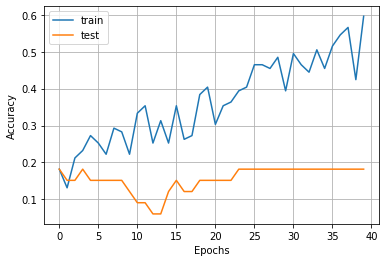

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

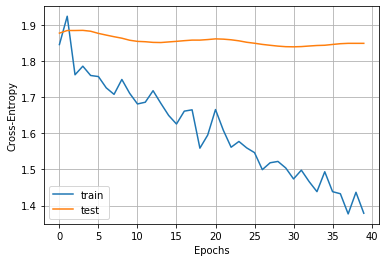

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()